# Смирнов Сергей ФПэ-01-22

## Задача 1
Для одной из промежуточных ступеней паровой турбины построить графически треугольники скоростей для 10 сечений равномерно распределенных по высоте при следующих исходных данных: 
* $P_0$ = 16,7 МПа
* $t_0$ = 520 ˚C
* $Р_2$ = 14,5 МПа
* $D_{cр}$ = 0.892 м
* $D_{корня}$ = 0.8 м
* $\rho_{ср}$ = 0.2
* $\alpha_{1_ср}$  = 13˚
* $β_2  =  β_1$  - 5˚
* φ = 0,97
* ψ = 0,935
* n = 50 1/c
* Степень реактивности по высоте распределена по формуле $\frac{1-\rho}{1-\rho_{ср}} = (\frac{R}{R_{ср}})^{-1.7}$
* Углол $\alpha_1$ распределен по высоте по формуле: $\frac{\alpha_1}{\alpha_{1_ср}} = (\frac{R}{R_{ср}})^2$

In [5]:
import iapws
import matplotlib.pyplot as plt 
import numpy as np
from iapws import IAPWS97 as gas
import math
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

p_0 = 16.7 * MPa
t_0 = to_kelvin(520)
p_2 = 14.5 * MPa
avg_diameter = [0.892/i for i in range(1,11)]
degree_of_reaction = [0.08/i for i in range(1,11)]
alpha_1_deg = 13
delta_beta_deg = 5
fi = 0.97
psi = 0.935
rotation_speed = 50

In [6]:
def calc_traingals(p_0, t_0, p_2, avg_diameter, degree_of_reaction, alpha_1_deg, delta_beta_deg, fi, psi, rotation_speed):
    c1_plot = []
    u1_plot = []
    w1_plot = []
    w2_plot = []
    u2_plot = []
    c2_plot = []
    for i in range(len(avg_diameter)):
        inlet_point = gas(P=p_0 * unit, T=t_0)
        outlet_point = gas(P=p_2 * unit, s=inlet_point.s)

        theoretical_heat_drop = inlet_point.h - outlet_point.h
        stator_heat_drop = theoretical_heat_drop * (1 - degree_of_reaction[i]) 
        rotor_heat_drop = theoretical_heat_drop * degree_of_reaction[i]

        c_1t = (2 * 1000 * stator_heat_drop) ** 0.5
        c_1 = c_1t * fi
        u = math.pi * avg_diameter[i] * rotation_speed

        sin_alpha_1 = math.sin(math.radians(alpha_1_deg))
        cos_alpha_1 = math.cos(math.radians(alpha_1_deg))

        w_1 = (c_1 ** 2 + u ** 2 - 2 * c_1 * u * cos_alpha_1) ** 0.5
        w_2t = (w_1 ** 2 + 2 * rotor_heat_drop * 1000) ** 0.5
        w_2 = w_2t * psi

        beta_1 = math.atan(sin_alpha_1 / (cos_alpha_1 - u / c_1))
        beta_1_deg = math.degrees(beta_1)
        beta_2_deg = beta_1_deg - delta_beta_deg

        sin_beta_2 = math.sin(math.radians(beta_2_deg))
        cos_beta_2 = math.cos(math.radians(beta_2_deg))

        c_2 = (w_2 ** 2 + u ** 2 - 2 * w_2 * u * cos_beta_2) ** 0.5

        alpha_2 = math.atan(sin_beta_2 / (cos_beta_2 - u / w_2))
        alpha_2_deg = math.degrees(alpha_2)
        c1_plot.append([[0, -c_1 * cos_alpha_1], [0, -c_1 * sin_alpha_1]])
        u1_plot.append([[-c_1 * cos_alpha_1, -c_1 * cos_alpha_1 + u], [-c_1 * sin_alpha_1, -c_1 * sin_alpha_1]])
        w1_plot.append([[0, -c_1 * cos_alpha_1 + u], [0, -c_1 * sin_alpha_1]])

        w2_plot.append([[0, w_2 * cos_beta_2], [0, -w_2 * sin_beta_2]])
        u2_plot.append([[w_2 * cos_beta_2, w_2 * cos_beta_2 - u], [-w_2 * sin_beta_2, -w_2 * sin_beta_2]])
        c2_plot.append([[0, w_2 * cos_beta_2 - u], [0, -w_2 * sin_beta_2]])
    return c1_plot, u1_plot, w1_plot, w2_plot, u2_plot, c2_plot

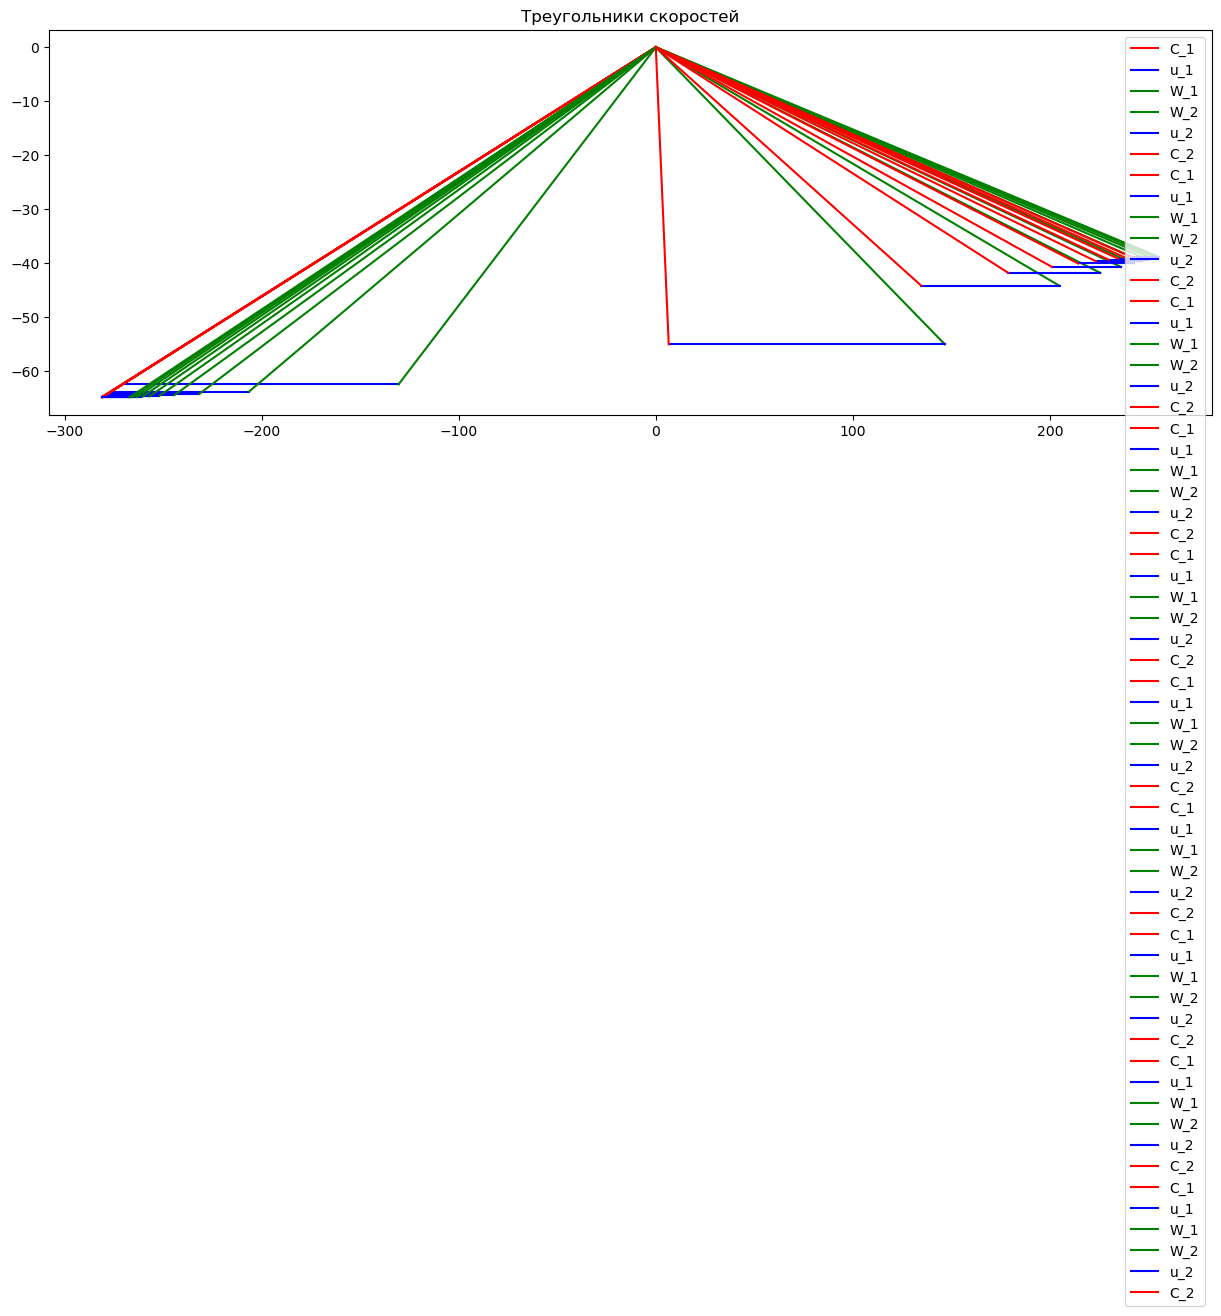

In [7]:
import matplotlib.pyplot as plt

c1_plot, u1_plot, w1_plot, w2_plot, u2_plot, c2_plot = calc_traingals(p_0, t_0, p_2, avg_diameter, degree_of_reaction, alpha_1_deg, delta_beta_deg, fi, psi, rotation_speed)

# c1_plot, u1_plot, w1_plot, w2_plot, u2_plot, c2_plot

fig, ax  = plt.subplots(1, 1, figsize=(15, 5))
for i in range(len(avg_diameter)):
    ax.plot(c1_plot[i][0], c1_plot[i][1], label='C_1', c='red')
    ax.plot(u1_plot[i][0], u1_plot[i][1], label='u_1', c='blue')
    ax.plot(w1_plot[i][0], w1_plot[i][1], label='W_1', c='green')
    
    ax.plot(w2_plot[i][0], w2_plot[i][1], label='W_2', c='green')
    ax.plot(u2_plot[i][0], u2_plot[i][1], label='u_2', c='blue')
    ax.plot(c2_plot[i][0], c2_plot[i][1], label='C_2', c='red')

ax.set_title("Треугольники скоростей")
ax.legend();

## Задача 2
Для условия `задачи 1` построить график зависимости лопаточного кпд на среднем диаметре от степени реактивности ступени $\eta_{ср}$ = f($\rho_{ср}$). Степень реактивности взять от 0.05 до 0.8 с шагом 0.001. При численной невозможности вычислить треугольники скоростей при какой-либо степени реактивности, заменить лопаточный КПД при этом значении степени реактивности на None


In [8]:
import iapws
import matplotlib.pyplot as plt 
import numpy as np
from iapws import IAPWS97 as gas
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None


p_k = 5 * kPa
p_0 = {"P = 5 МPa":5 * MPa,"P = 10 МPa": 10 * MPa,"P = 15 МPa": 15* MPa,"P = 20 МPa": 20 * MPa}
t_0 = [300, 350, 400, 450, 500]

In [9]:
# def get_available_energy(kappa, outlet_speed_loss):
#     return theoretical_heat_drop * 1000 - kappa * outlet_speed_loss

def calc_traingals(p_0, t_0, p_2, avg_diameter, degree_of_reaction, alpha_1_deg, delta_beta_deg, fi, psi, rotation_speed):
    # c1_plot = []
    # u1_plot = []
    # w1_plot = []
    # w2_plot = []
    # u2_plot = []
    # c2_plot = []
    kappa = 1
    eta = []
    for i in range(len(degree_of_reaction)):
        inlet_point = gas(P=p_0 * unit, T=t_0)
        outlet_point = gas(P=p_2 * unit, s=inlet_point.s)

        theoretical_heat_drop = inlet_point.h - outlet_point.h
        stator_heat_drop = theoretical_heat_drop * (1 - degree_of_reaction[i]) 
        rotor_heat_drop = theoretical_heat_drop * degree_of_reaction[i]

        c_1t = (2 * 1000 * stator_heat_drop) ** 0.5
        c_1 = c_1t * fi
        u = math.pi * avg_diameter * rotation_speed

        sin_alpha_1 = math.sin(math.radians(alpha_1_deg))
        cos_alpha_1 = math.cos(math.radians(alpha_1_deg))

        w_1 = (c_1 ** 2 + u ** 2 - 2 * c_1 * u * cos_alpha_1) ** 0.5
        w_2t = (w_1 ** 2 + 2 * rotor_heat_drop * 1000) ** 0.5
        w_2 = w_2t * psi

        beta_1 = math.atan(sin_alpha_1 / (cos_alpha_1 - u / c_1))
        beta_1_deg = math.degrees(beta_1)
        beta_2_deg = beta_1_deg - delta_beta_deg

        sin_beta_2 = math.sin(math.radians(beta_2_deg))
        cos_beta_2 = math.cos(math.radians(beta_2_deg))

        c_2 = (w_2 ** 2 + u ** 2 - 2 * w_2 * u * cos_beta_2) ** 0.5

        alpha_2 = math.atan(sin_beta_2 / (cos_beta_2 - u / w_2))
        alpha_2_deg = math.degrees(alpha_2)
        # c1_plot = [[0, -c_1 * cos_alpha_1], [0, -c_1 * sin_alpha_1]]
        # u1_plot = [[-c_1 * cos_alpha_1, -c_1 * cos_alpha_1 + u], [-c_1 * sin_alpha_1, -c_1 * sin_alpha_1]]
        # w1_plot = [[0, -c_1 * cos_alpha_1 + u], [0, -c_1 * sin_alpha_1]]

        # w2_plot = [[0, w_2 * cos_beta_2], [0, -w_2 * sin_beta_2]]
        # u2_plot = [[w_2 * cos_beta_2, w_2 * cos_beta_2 - u], [-w_2 * sin_beta_2, -w_2 * sin_beta_2]]
        # c2_plot = [[0, w_2 * cos_beta_2 - u], [0, -w_2 * sin_beta_2]]

        mass_flow = outlet_point.rho * w_2 * math.pi * avg_diameter**2/2
        
        outlet_speed_loss = 0.5 * c_2 ** 2

        stator_speed_loss = 0.5 * ((c_1t ** 2) - (c_1 ** 2))
        rotor_speed_loss = 0.5 * ((w_2t ** 2) - (w_2 ** 2))

        # outlet_speed_loss = 0.5 * c_2 ** 2
        
        constant_part = (theoretical_heat_drop * 1000 - kappa * outlet_speed_loss) - stator_speed_loss - rotor_speed_loss
        useful_energy = constant_part - (1 - kappa) * outlet_speed_loss
        eta.append(useful_energy / (theoretical_heat_drop * 1000 - kappa * outlet_speed_loss))
    return eta

In [10]:
p_0 = 16.7 * MPa
t_0 = to_kelvin(520)
p_2 = 14.5 * MPa
avg_diameter = 0.892
degree_of_reaction = [0.05 + i*0.001 for i in range(750)]
alpha_1_deg = 13
delta_beta_deg = 5
fi = 0.97
psi = 0.935
rotation_speed = 50

eta = calc_traingals(p_0, t_0, p_2, avg_diameter, degree_of_reaction, alpha_1_deg, delta_beta_deg, fi, psi, rotation_speed)

<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Vait_\AppData\Local\Temp\ipykernel_20104\2482865558.py:2: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Зависимость $\eta$ от степени реактивности', fontsize=16)
C:\Users\Vait_\AppData\Local\Temp\ipykernel_20104\2482865558.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$\eta$', fontsize=14)


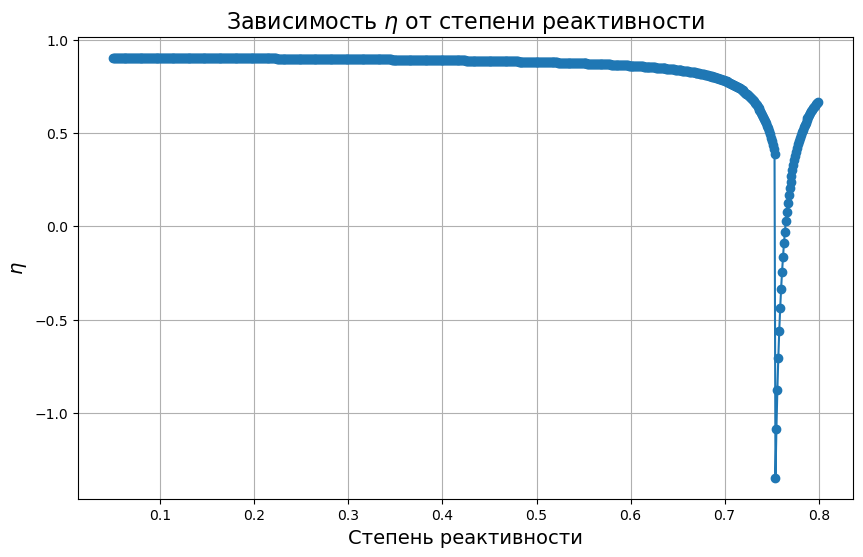

In [11]:
plt.figure(figsize=(10, 6))
plt.title('Зависимость $\eta$ от степени реактивности', fontsize=16)
plt.xlabel('Степень реактивности', fontsize=14)
plt.ylabel('$\eta$', fontsize=14)
# plt.legend()  
plt.grid(True)
plt.plot(degree_of_reaction,eta, marker='o')
# plt.legend(p_0.keys())
plt.show()

## Задача 3
Написать код отрисовывающий процесс расширения в турбине с промежуточным перегревом в PV-диаграмме.
Для примера отрисовки взять расчет при:
* $P_0$ = 25 МПа
* $t_0$ = 560 K
* $P_k$ = 3.5 кПа
* $P_{пп}$ = 3.62 МПа
* $t_{пп}$ = 565 K
* $\eta_{oi}$ = 0.85
* $\eta_{мех}$ = 0.995
* $\eta_{эл}$ = 0.99

In [12]:
from typing import List, Tuple, Optional
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt
import numpy as np
from math import log10


MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

p_0 = 25 * MPa #Начальное давление
t_0 = 560 #Начальная температура
p_middle = 3.62 * MPa #Давление промперегрева
t_middle = 565 #Температура промперегрева
p_k = 3.5 * kPa #Давление в конденсаторе
t_feed_water = 269
p_feed_water = 1.35 * p_0

internal_efficiency = 0.85
mechanical_efficiency = 0.995
generator_efficiency = 0.99

delta_p0 = 0.05 * p_0
delta_p_middle = 0.1 * p_middle
delta_p_1 = 0.03 * p_middle


real_p0 = p_0 - delta_p0
real_p1t = p_middle + delta_p_middle
real_p_middle = p_middle - delta_p_1

_point_0 = gas(P = p_0 * unit, T=to_kelvin(t_0))
point_0 = gas(P=real_p0 * unit, h=_point_0.h)
point_1t = gas(P=real_p1t * unit, s=_point_0.s)

hp_heat_drop = (_point_0.h - point_1t.h) * internal_efficiency
h_1 = point_0.h - hp_heat_drop
point_1 = gas(P=real_p1t * unit, h=h_1)

_point_middle = gas(P=p_middle * unit, T=to_kelvin(t_middle))
point_middle = gas(P=real_p_middle * unit, h=_point_middle.h)
point_2t = gas(P=p_k * unit, s=_point_middle.s)

lp_heat_drop = (_point_middle.h - point_2t.h) * internal_efficiency
h_2 = point_middle.h - lp_heat_drop
point_2 = gas(P=p_k * unit, h=h_2)

def plot_curve_between_points(ax: plt.Axes, point_start: IAPWS97, point_end: IAPWS97, num_points: int = 200, **kwargs):
    s_values = np.linspace(point_start.s, point_end.s, num_points)
    MPa = 1e6
    v_values = []
    p_values = []
    for s in s_values:
        h = np.interp(s, [point_start.s, point_end.s], [point_start.h, point_end.h])
        try:
            intermediate_point = IAPWS97(s=s, h=h)
            v_values.append(intermediate_point.v)
            p_values.append(intermediate_point.P*MPa)
        except ValueError:
            continue
    
    ax.plot(v_values, p_values, **kwargs)

In [25]:
def plot_isobars_therms(ax: plt.Axes, point_start: IAPWS97, num_points: int = 100, **kwargs):
    MPa = 1e6
    if point_start.P > 0.1:
        isoP_V = np.linspace(point_start.v-0.007, point_start.v+0.007, num_points)
        isoP_p = np.array([point_start.P for i in isoP_V])
        ax.plot(isoP_V, isoP_p*MPa, **kwargs)
        
        T_iso = point_start.T
        isoP = np.linspace(point_start.P-1.5, point_start.P+1.5, num_points)
        isoT_v = np.array([gas(P=i, T=T_iso).v for i in isoP])
        # isoT_p = []
        ax.plot(isoT_v, isoP*MPa, **kwargs)
    else:
        isoP_V = np.linspace(point_start.v-10, point_start.v+10, num_points)
        isoP_p = np.array([point_start.P for i in isoP_V])
        ax.plot(isoP_V, isoP_p*MPa, **kwargs)
        
        # T_iso = point_start.T
        # isoP = np.linspace(point_start.P, point_start.P+1.5, num_points)
        # isoT_v = np.array([gas(P=i, T=T_iso).v for i in isoP])
        # ax.plot(isoT_v, isoP*MPa, **kwargs)

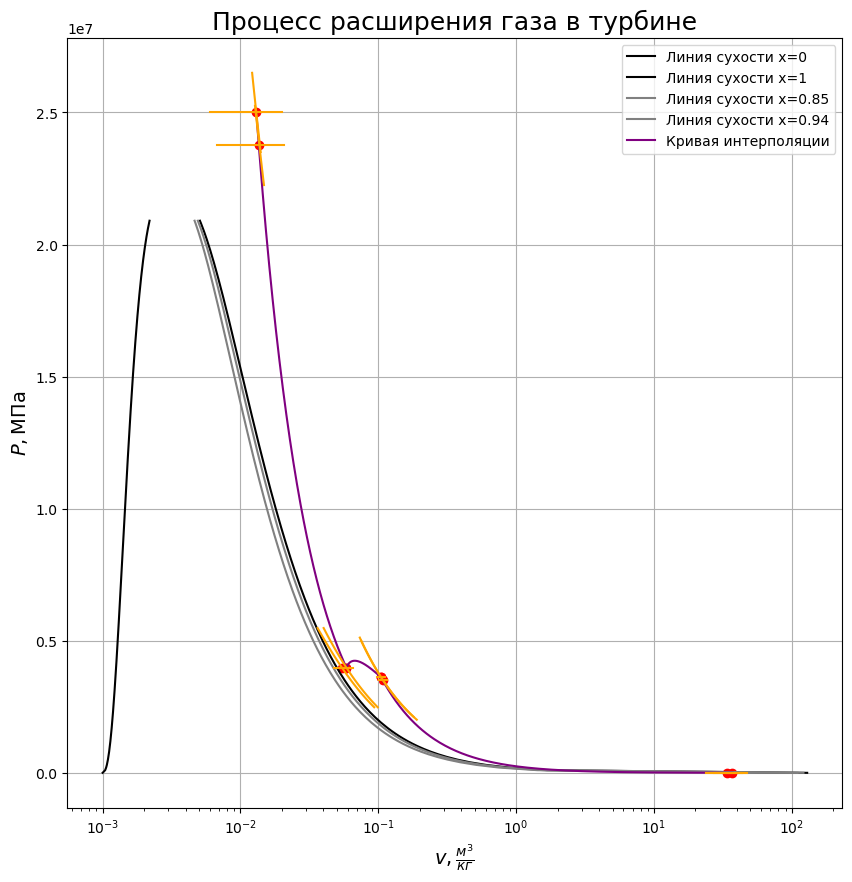

In [27]:
ps = np.arange(1e3, 2.1e7, 1e5)
pw = np.arange(1e3, 2.1e7, 1e5)

vss = [gas(P=_p/MPa, x = 1).v for _p in ps]
vws = [gas(P=_p/MPa, x = 0).v for _p in ps]
hum94 = [gas(P=_p/MPa, x = 0.94).v for _p in ps]
hum85 = [gas(P=_p/MPa, x = 0.85).v for _p in ps]

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(vws, ps, label='Линия сухости x=0', color = "black")
ax.plot(vss, ps, label='Линия сухости x=1', color = "black")
ax.plot(hum85, ps, label='Линия сухости x=0.85', color = "gray")
ax.plot(hum94, ps, label='Линия сухости x=0.94', color = "gray")

ax.scatter(_point_0.v, _point_0.P*MPa, color='red') #, label='Начальная точка'
ax.scatter(point_1.v, point_1.P*MPa, color='red') #, label='Конечная точка'

ax.scatter(point_0.v, point_0.P*MPa, color='red')
ax.scatter(point_1t.v, point_1t.P*MPa, color='red')

ax.scatter(point_1.v, point_1.P*MPa, color='red')
ax.scatter(_point_middle.v, _point_middle.P*MPa, color='red')

ax.scatter(point_middle.v, point_middle.P*MPa, color='red')
ax.scatter(point_2.v, point_2.P*MPa, color='red')

ax.scatter(_point_middle.v, _point_middle.P*MPa, color='red')
ax.scatter(point_2t.v, point_2t.P*MPa, color='red')

plot_curve_between_points(ax, _point_0, point_1, color='purple', label='Кривая интерполяции')
plot_curve_between_points(ax, point_1, _point_middle, color='purple')
plot_curve_between_points(ax, _point_middle, point_2, color='purple')

plot_isobars_therms(ax, _point_0, color = "orange")
plot_isobars_therms(ax, point_0, color = "orange")
plot_isobars_therms(ax, point_1, color = "orange")
plot_isobars_therms(ax, point_1t, color = "orange")
plot_isobars_therms(ax, point_middle, color = "orange")
plot_isobars_therms(ax, _point_middle, color = "orange")
plot_isobars_therms(ax, point_2, color = "orange")
plot_isobars_therms(ax, point_2t, color = "orange")

# plot_isobars_therms(ax, point_2, color = "orange")
# plot_isobars_therms(ax, point_2t, color = "orange")
# ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$v, \frac{м^3}{кг}$", fontsize=14)
ax.set_ylabel(r"$P, \text{МПа}$", fontsize=14)
ax.set_title("Процесс расширения газа в турбине", fontsize=18)
ax.legend()
ax.grid()
plt.show()

In [15]:
from typing import List, Tuple, Optional
from iapws import IAPWS97
import matplotlib.pyplot as plt
import numpy as np
from math import log10


MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

p_0 = 25 * MPa #Начальное давление
t_0 = 560 #Начальная температура
p_middle = 3.62 * MPa #Давление промперегрева
t_middle = 565 #Температура промперегрева
p_k = 3.5 * kPa #Давление в конденсаторе
t_feed_water = 269
p_feed_water = 1.35 * p_0

internal_efficiency = 0.85
mechanical_efficiency = 0.995
generator_efficiency = 0.99

delta_p0 = 0.05 * p_0
delta_p_middle = 0.1 * p_middle
delta_p_1 = 0.03 * p_middle


real_p0 = p_0 - delta_p0
real_p1t = p_middle + delta_p_middle
real_p_middle = p_middle - delta_p_1

_point_0 = gas(P = p_0 * unit, T=to_kelvin(t_0))
point_0 = gas(P=real_p0 * unit, h=_point_0.h)
point_1t = gas(P=real_p1t * unit, s=_point_0.s)

hp_heat_drop = (_point_0.h - point_1t.h) * internal_efficiency
h_1 = point_0.h - hp_heat_drop
point_1 = gas(P=real_p1t * unit, h=h_1)

_point_middle = gas(P=p_middle * unit, T=to_kelvin(t_middle))
point_middle = gas(P=real_p_middle * unit, h=_point_middle.h)
point_2t = gas(P=p_k * unit, s=_point_middle.s)

lp_heat_drop = (_point_middle.h - point_2t.h) * internal_efficiency
h_2 = point_middle.h - lp_heat_drop
point_2 = gas(P=p_k * unit, h=h_2)

def plot_curve_between_points(ax: plt.Axes, point_start: IAPWS97, point_end: IAPWS97, num_points: int = 200, **kwargs):
    s_values = np.linspace(point_start.s, point_end.s, num_points)
    MPa = 1e6
    v_values = []
    p_values = []
    for s in s_values:
        h = np.interp(s, [point_start.s, point_end.s], [point_start.h, point_end.h])
        try:
            intermediate_point = IAPWS97(s=s, h=h)
            v_values.append(intermediate_point.v)
            p_values.append(intermediate_point.P*MPa)
        except ValueError:
            continue
    
    ax.plot(v_values, p_values, **kwargs)

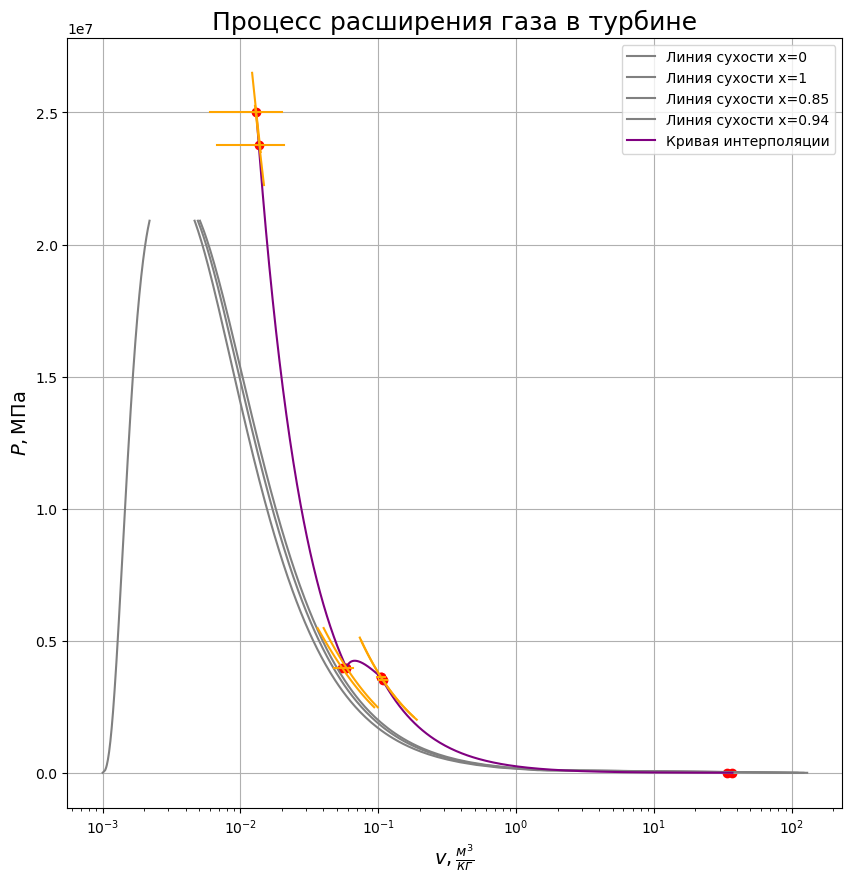

In [137]:
ps = np.arange(1e3, 2.1e7, 1e5)
pw = np.arange(1e3, 2.1e7, 1e5)

vss = [gas(P=_p/MPa, x = 1).v for _p in ps]
vws = [gas(P=_p/MPa, x = 0).v for _p in ps]
hum94 = [gas(P=_p/MPa, x = 0.94).v for _p in ps]
hum85 = [gas(P=_p/MPa, x = 0.85).v for _p in ps]

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(vws, ps, label='Линия сухости x=0', color = "gray")
ax.plot(vss, ps, label='Линия сухости x=1', color = "gray")
ax.plot(hum85, ps, label='Линия сухости x=0.85', color = "gray")
ax.plot(hum94, ps, label='Линия сухости x=0.94', color = "gray")

ax.scatter(_point_0.v, _point_0.P*MPa, color='red') #, label='Начальная точка'
ax.scatter(point_1.v, point_1.P*MPa, color='red') #, label='Конечная точка'

ax.scatter(point_0.v, point_0.P*MPa, color='red')
ax.scatter(point_1t.v, point_1t.P*MPa, color='red')

ax.scatter(point_1.v, point_1.P*MPa, color='red')
ax.scatter(_point_middle.v, _point_middle.P*MPa, color='red')

ax.scatter(point_middle.v, point_middle.P*MPa, color='red')
ax.scatter(point_2.v, point_2.P*MPa, color='red')

ax.scatter(_point_middle.v, _point_middle.P*MPa, color='red')
ax.scatter(point_2t.v, point_2t.P*MPa, color='red')

plot_curve_between_points(ax, _point_0, point_1, color='purple', label='Кривая интерполяции')
plot_curve_between_points(ax, point_1, _point_middle, color='purple')
plot_curve_between_points(ax, _point_middle, point_2, color='purple')

plot_isobars_therms(ax, _point_0, color = "orange")
plot_isobars_therms(ax, point_0, color = "orange")
plot_isobars_therms(ax, point_1, color = "orange")
plot_isobars_therms(ax, point_1t, color = "orange")
plot_isobars_therms(ax, point_middle, color = "orange")
plot_isobars_therms(ax, _point_middle, color = "orange")
# plot_isobars_therms(ax, point_2, color = "orange")
# plot_isobars_therms(ax, point_2t, color = "orange")

# plot_isobars_therms(ax, point_2, color = "orange")
# plot_isobars_therms(ax, point_2t, color = "orange")
# ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$v, \frac{м^3}{кг}$", fontsize=14)
ax.set_ylabel(r"$P, \text{МПа}$", fontsize=14)
ax.set_title("Процесс расширения газа в турбине", fontsize=18)
ax.legend()
ax.grid()
plt.show()

In [44]:
_point_0.v, _point_0.P

(0.013028025103184812, 25.0)

In [51]:
def plot_isobars()

(0.013712072068653759, 23.75)

In [107]:
def plot_isobars_therms(ax: plt.Axes, point_start: IAPWS97, num_points: int = 100, **kwargs):
    MPa = 1e6
    
    isoP = np.linspace(point_start.P-1, point_start.P+2, num_points)
    isoP_V = np.array([point_start.v for i in isoP])
    ax.plot(isoP_V, isoP*MPa, **kwargs)

    T_iso = point_start.T
    isoT_v = np.array([gas(P=i, T=T_iso).v for i in isoP])
    # isoT_p = []
    ax.plot(isoT_v, isoP*MPa, **kwargs)

    # for i in isoP:
    #     t = 
    
    # v_values = []
    # p_values = []
    # for s in s_values:
    #     h = np.interp(s, [point_start.s, point_end.s], [point_start.h, point_end.h])
    #     try:
    #         intermediate_point = IAPWS97(s=s, h=h)
    #         v_values.append(intermediate_point.v)
    #         p_values.append(intermediate_point.P*MPa)
    #     except ValueError:
    #         continue
    
    # ax.plot(v_values, p_values, **kwargs)

In [133]:
def plot_isobars_therms(ax: plt.Axes, point_start: IAPWS97, num_points: int = 100, **kwargs):
    MPa = 1e6
    if point_start.P > 0.1:
        isoP_V = np.linspace(point_start.v-0.007, point_start.v+0.007, num_points)
        isoP_p = np.array([point_start.P for i in isoP_V])
        ax.plot(isoP_V, isoP_p*MPa, **kwargs)
        
        T_iso = point_start.T
        isoP = np.linspace(point_start.P-1.5, point_start.P+1.5, num_points)
        isoT_v = np.array([gas(P=i, T=T_iso).v for i in isoP])
        # isoT_p = []
        ax.plot(isoT_v, isoP*MPa, **kwargs)
    else:
        isoP_V = np.linspace(point_start.v-0.05, point_start.v+0.05, num_points)
        isoP_p = np.array([point_start.P for i in isoP_V])
        ax.plot(isoP_V, isoP_p*MPa, **kwargs)
        
        T_iso = point_start.T
        isoP = np.linspace(point_start.P, point_start.P+1.5, num_points)
        isoT_v = np.array([gas(P=i, T=T_iso).v for i in isoP])
        # isoT_p = []
        ax.plot(isoT_v, isoP*MPa, **kwargs)
    
    # for i in isoP:
    #     t = 
    
    # v_values = []
    # p_values = []
    # for s in s_values:
    #     h = np.interp(s, [point_start.s, point_end.s], [point_start.h, point_end.h])
    #     try:
    #         intermediate_point = IAPWS97(s=s, h=h)
    #         v_values.append(intermediate_point.v)
    #         p_values.append(intermediate_point.P*MPa)
    #     except ValueError:
    #         continue
    
    # ax.plot(v_values, p_values, **kwargs)